In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
plt.rc('font', family='serif')

## Projections

In [2]:
start_year = 2010
end_year = 2100

years = np.arange(start_year, end_year+1)
num_of_years = len(years)

In [3]:
def create_consumption_growth_ts(T_0, T_ts, beta, g_0):
    g_ts = g_0 - beta * (T_ts[:-1] ** 2 - T_0 ** 2)
    return g_ts

In [4]:
def create_total_consumption_Pretis(years, g_ts, W_start_year=80):
    W = [W_start_year]
    W_previous_year = W_start_year
    for i in range(len(years) - 1):
        W_this_year = W_previous_year * np.exp(g_ts[i])
        W.append(W_this_year)
        W_previous_year = W_this_year

    W = np.asarray(W)
    return W

## Create g as a function of T

In [5]:
g_0 = 0.02
beta = 0.0001
W_0 = 80

T_1 = 0.9
T_0 = 1.2

$$ g(T)=g^* - \beta T^2$$
$$ g^* = g_0 + \beta T_{0}^2$$

W is independent

In [6]:
T_const = T_1 * np.ones(num_of_years)
T_1pt5 = T_1 + np.linspace(0, 0.6, num_of_years)
T_2pt0 = T_1 + np.linspace(0, 1.1, num_of_years)

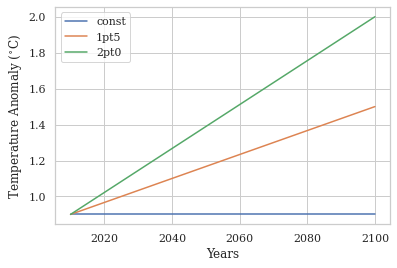

In [7]:
plt.plot(years, T_const, label="const")
plt.plot(years, T_1pt5, label="1pt5")
plt.plot(years, T_2pt0, label="2pt0")
plt.xlabel("Years")
plt.ylabel("Temperature Anomaly ($^{\circ}$C)")
plt.legend()

In [8]:
g_const = create_consumption_growth_ts(T_0, T_const, beta, g_0)
g_1pt5 = create_consumption_growth_ts(T_0, T_1pt5, beta, g_0)
g_2pt0 = create_consumption_growth_ts(T_0, T_2pt0, beta, g_0)

In [9]:
W_1pt5 = create_total_consumption_Pretis(years, g_1pt5)
W_2pt0 = create_total_consumption_Pretis(years, g_2pt0)
W_const = create_total_consumption_Pretis(years, g_const)

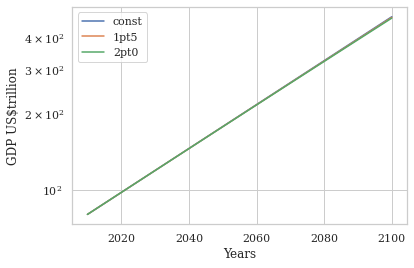

In [10]:
plt.plot(years, W_const, label="const")
plt.plot(years, W_1pt5, label="1pt5")
plt.plot(years, W_2pt0, label="2pt0")
plt.yscale("log")
plt.xlabel("Years")
plt.ylabel("GDP US$trillion")
plt.legend()

In [11]:
percentage_change_1pt5 = (W_1pt5-W_const)*100/W_const
percentage_change_2pt0 = (W_2pt0-W_const)*100/W_const

Text(0, 0.5, 'Percentage Change in GDP (%)')

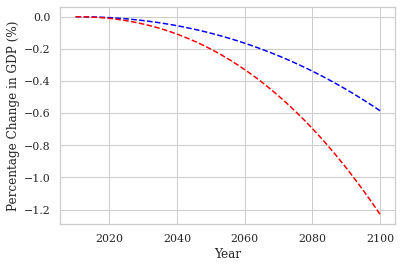

In [12]:
plt.plot(years, percentage_change_1pt5, label="1.5 Degrees Celsius", color="blue", linestyle='dashed')
plt.plot(years, percentage_change_2pt0, label="2 Degrees Celsius", color="red", linestyle='dashed')
plt.xlabel("Year")
plt.ylabel("Percentage Change in GDP (%)")

Add Pretis Bounds

In [13]:
df_1pt5_middle = pd.read_csv("Pretis_1pt5_middle.csv", header=None)
df_1pt5_upper = pd.read_csv("Pretis_1pt5_upper.csv", header=None)
df_1pt5_lower = pd.read_csv("Pretis_1pt5_lower.csv", header=None)

In [14]:
df_2pt0_middle = pd.read_csv("Pretis_2pt0_middle.csv", header=None)
df_2pt0_upper = pd.read_csv("Pretis_2pt0_upper.csv", header=None)
df_2pt0_lower = pd.read_csv("Pretis_2pt0_lower.csv", header=None)

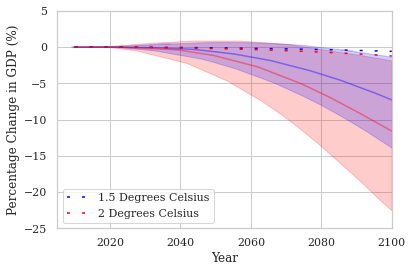

In [15]:
fig = plt.figure()
# plt.plot(df_1pt5_upper[0], df_1pt5_upper[1], color="orange")
plt.plot(df_1pt5_middle[0], df_1pt5_middle[1], color="blue", alpha=0.4)
plt.plot(df_2pt0_middle[0], df_2pt0_middle[1], color="red", alpha=0.4)
# plt.plot(df_1pt5_lower[0], df_1pt5_lower[1], color="orange")

x1 = np.asarray(df_2pt0_lower[0])
x2 = np.asarray(df_2pt0_upper[0])

y1 = np.asarray(df_2pt0_lower[1])
y2 = np.asarray(df_2pt0_upper[1])
plt.fill(
    np.append(x1, x2[::-1]),
    np.append(y1, y2[::-1]),
    alpha=0.2,
    color="red"
)

x1 = np.asarray(df_1pt5_lower[0])
x2 = np.asarray(df_1pt5_upper[0])

y1 = np.asarray(df_1pt5_lower[1])
y2 = np.asarray(df_1pt5_upper[1])
plt.fill(
    np.append(x1, x2[::-1]),
    np.append(y1, y2[::-1]),
    alpha=0.2,
    color="blue"
)

plt.plot(years, percentage_change_1pt5, label="1.5 Degrees Celsius", color="blue", dashes=(2, 8))
plt.plot(years, percentage_change_2pt0, label="2 Degrees Celsius", color="red", dashes=(2, 8))

plt.xlabel("Year")
plt.ylabel("Percentage Change in GDP (%)")
plt.xlim(2005, 2100)
plt.ylim(-25, 5)
plt.legend()

# plt.plot(T_forecast_years, -S_Wt_1pt5/W_1pt5, color="black", linestyle="dashed")

# fig.savefig('../peak_warming_calculator/figures/Pretis.png', bbox_inches='tight', dpi = 300)